In [15]:
#knn with the cross validation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


#read the csv
data = pd.read_csv("/home/flippercode/Documents/machine-learning/Datasets/credit_data.csv")
#data = pd.read_csv("/home/flippercode/Documents/machine-learning/Datasets/ingredients.csv")


In [16]:
data.head(10)


,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [17]:
data.features = data[["age","loan"]]
#data.features = data[["Sweetness","Crunchiness"]]
data.target = data.default
#data.target = data.Type

In [18]:
data.target

0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    1
1984    0
1985    0
1986    0
1987    0
1988    0
1989    1
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 2000, dtype: int64

In [19]:
data.features = preprocessing.MinMaxScaler().fit_transform(data.features)


In [20]:
feature_train, feature_test, target_train, target_test = train_test_split(data.features,data.target, test_size=0.3)

model =  KNeighborsClassifier(n_neighbors = 40)
modelfitting = model.fit(feature_train,target_train)

prediction = modelfitting.predict(feature_test)



cross_valid_scores = []

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, data.features, data.target,cv=10, scoring = "accuracy")
    cross_valid_scores.append(scores.mean())
    
print("Optimal k with cross-validation: ", np.argmax(cross_valid_scores))      
    

Optimal k with cross-validation:  40


In [21]:
print(confusion_matrix(target_test,prediction))
print(accuracy_score(target_test, prediction))

[[498  16]
 [ 32  54]]
0.92


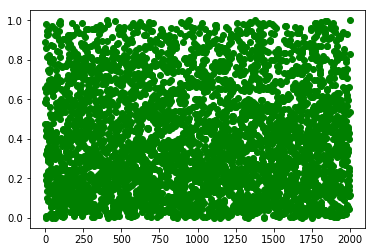

In [22]:
plt.plot(data.features,'ro',color="green")
plt.show()

In [23]:

pred = model.predict(np.array([[1,5]]))
print(pred)

[0]
